#  Part I Exploratory Data Analysis


The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [41]:
# importing modules 

import json 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn import metrics 

In [42]:
# loading json files 

file1 = 'logins.json'
file2 = 'ultimate_data_challenge.json'

with open(file1) as l:
    logins = json.load(l)
    
with open(file2) as u:
    data = json.load(u)
    
login_data = pd.DataFrame(logins)
user_data = pd.DataFrame(data)

In [43]:
login_data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [44]:
login_data.dtypes

login_time    object
dtype: object

In [45]:
login_data['login_time'] = pd.to_datetime(login_data['login_time'], format='%Y-%m-%d %H:%M:%S')

Adding column for login count

In [46]:
login_data = login_data.set_index('login_time')
login_data['login_count'] = 1
login_data.head()

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


Resample data into 15 minute intervals:

In [47]:
login_15 = login_data.resample('15Min').sum()

In [48]:
login_15 = login_15.reset_index()

In [49]:
login_15.head()

,login_time,login_count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


Visualize 15 minute interval login counts:

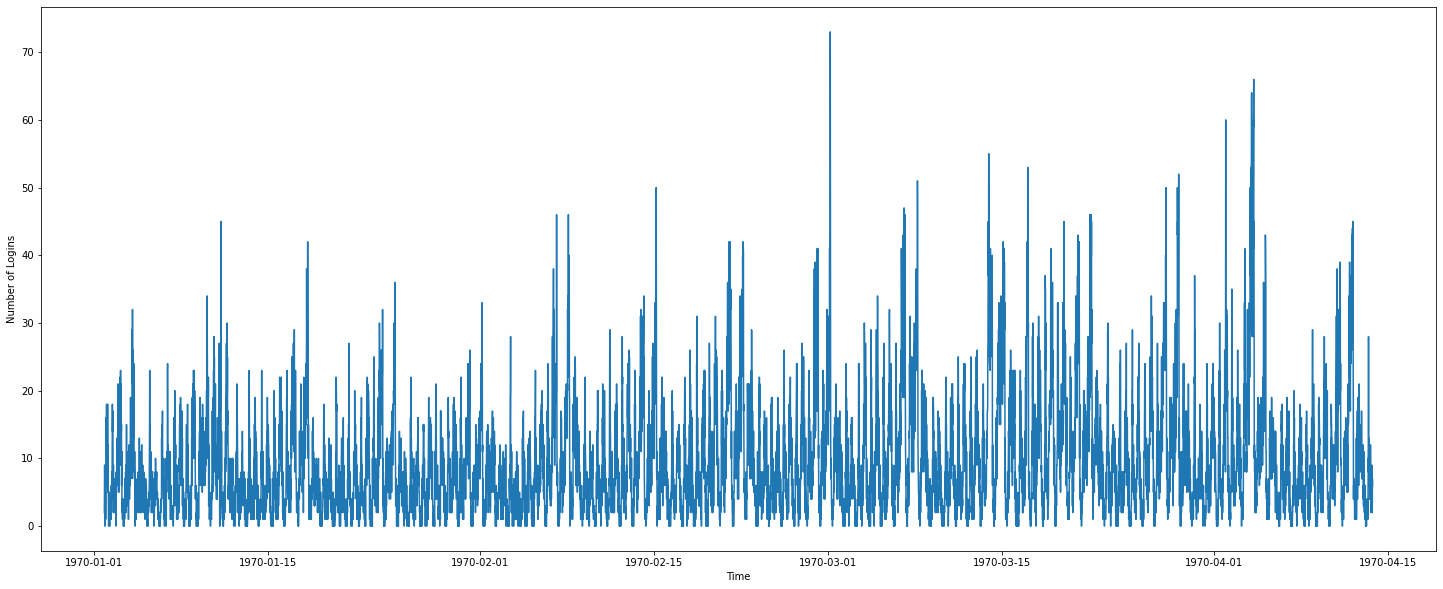

In [50]:
_ = plt.figure(figsize=(25,10))
_ = plt.plot('login_time', 'login_count', data=login_15)
_ = plt.xlabel('Time')
_ = plt.ylabel('Number of Logins')

Visualize 15 minute interval login counts daily:

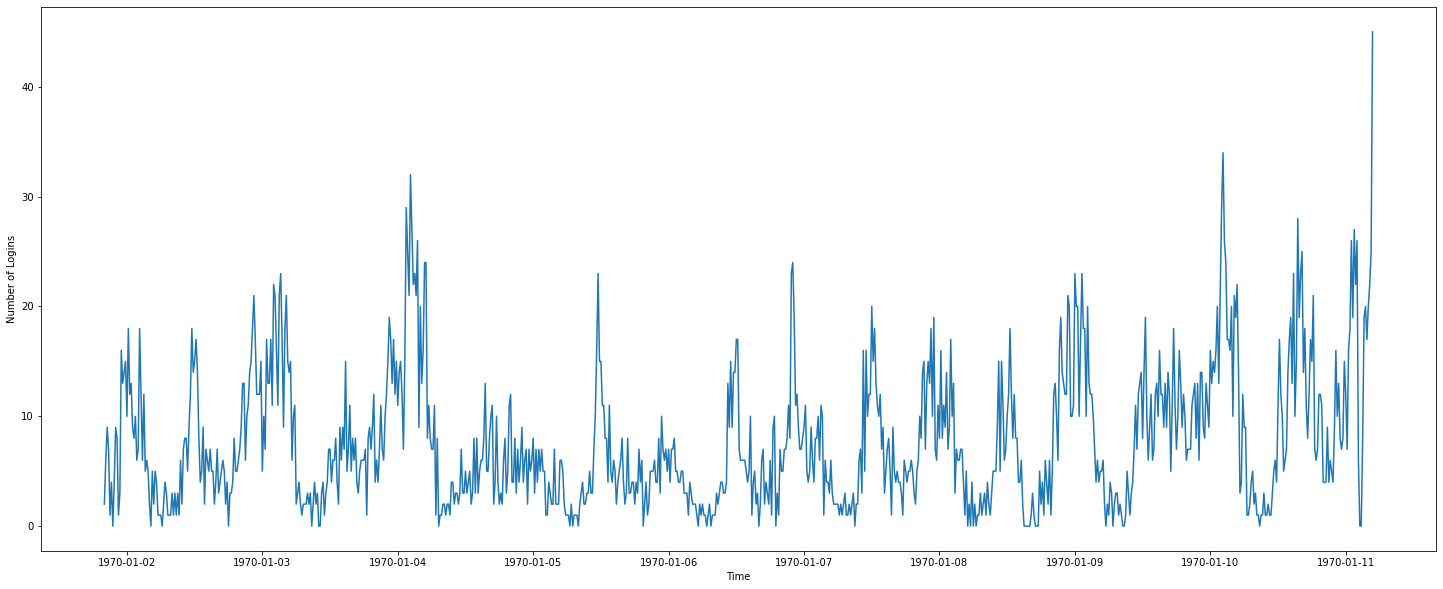

In [51]:
_ = plt.figure(figsize=(25,10))
_ = plt.plot('login_time', 'login_count', data=login_15[0:900])
_ = plt.xlabel('Time')
_ = plt.ylabel('Number of Logins')

The daily data shows that there is a spike in login counts about once every 12 hours.

# Part II Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

1. The measure to success is to see whether there is a significant increase in number of drivers who travel between both cities after the toll reinbursement program is implemented. A simple way to do this is to track the number of cars that pass through the tolls and compare it to before the toll reinbursement program started. 

2. We can collect data on how many cars pass through the two way toll daily and at what time patterns this occurs. Data would be recorded from before the toll reinbursement program was implemented and after. Then, a z-statistic test with a 95% confidence interval would be used to examine whether or not the difference is statistically significant. If the results are statistically significant, it would mean that reimbursing toll costs was effective in promoting drivers to travel to both cities. 

# Part III Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account inJanuary 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [53]:
user_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [54]:
user_data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [55]:
user_data.shape

(50000, 12)

In [56]:
user_data.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [57]:
user_data['signup_date'] = pd.to_datetime(user_data['signup_date'], format='%Y-%m-%d')
user_data['last_trip_date'] = pd.to_datetime(user_data['last_trip_date'], format='%Y-%m-%d')

In [58]:
active = []

for i in range(len(user_data)):
    start = user_data['signup_date'][i]
    six_mo = start + relativedelta(months=+6)
    thirty_before = six_mo - relativedelta(months=+1)
    if user_data['last_trip_date'][i] >= thirty_before:
        active.append(1)
    else:
        active.append(0)

In [59]:
user_data['active'] = active

In [60]:
user_data['active'].value_counts()

0    37743
1    12257
Name: active, dtype: int64

In [61]:
percent_active = 12257 / 50000
percent_active

0.24514

The percent of retained users is 24.51%.

Next we will start on the predictive model and cleaning the dataset.

In [62]:
user_data.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
active                       0
dtype: int64

Filling null values:

In [63]:
mean1 = user_data['avg_rating_of_driver'].mean()

In [64]:
user_data['avg_rating_of_driver'] = user_data['avg_rating_of_driver'].fillna(value=user_data['avg_rating_of_driver'].mean())
user_data['avg_rating_by_driver'] = user_data['avg_rating_by_driver'].fillna(value=user_data['avg_rating_by_driver'].mean())
user_data['phone'] = user_data['phone'].fillna(value=user_data['phone'].mode())

In [65]:
user_data.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
active                             int64
dtype: object

Dealing with categorical data:

In [66]:
user_data['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [67]:
df = pd.get_dummies(user_data, columns=['city', 'phone', 'ultimate_black_user'])
df

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,2014-01-25,4.700000,1.10,2014-06-17,15.4,46.2,3.67,5.0,0,0,1,0,0,1,0,1
1,0,2014-01-29,5.000000,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,1,0,0,1,0,1,0
2,3,2014-01-06,4.300000,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,1,0,0,0,1,1,0
3,9,2014-01-10,4.600000,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,0,1,0,0,1,0,1
4,14,2014-01-27,4.400000,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2014-01-25,5.000000,1.00,2014-06-05,0.0,100.0,5.63,4.2,0,0,1,0,0,1,1,0
49996,1,2014-01-24,4.601559,1.00,2014-01-25,0.0,0.0,0.00,4.0,0,1,0,0,0,1,1,0
49997,0,2014-01-31,5.000000,1.00,2014-05-22,0.0,100.0,3.86,5.0,0,0,0,1,1,0,0,1
49998,2,2014-01-14,3.000000,1.00,2014-01-15,0.0,100.0,4.58,3.5,0,1,0,0,0,1,1,0


In [68]:
df.columns

Index(['trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'surge_pct', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'active', 'city_Astapor', 'city_King's Landing',
       'city_Winterfell', 'phone_Android', 'phone_iPhone',
       'ultimate_black_user_False', 'ultimate_black_user_True'],
      dtype='object')

Defining variables: 

In [69]:
X = df[['trips_in_first_30_days', 'avg_rating_of_driver',
       'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'city_Astapor', 'city_King\'s Landing',
       'city_Winterfell', 'phone_Android', 'phone_iPhone',
       'ultimate_black_user_False', 'ultimate_black_user_True']]
y = df['active']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [73]:
lr = LogisticRegression()
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
pipe.score(X_test, y_test)

0.77136

In [74]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[9063  426]
 [2432  579]]


Text(114.0, 0.5, 'Actual Label')

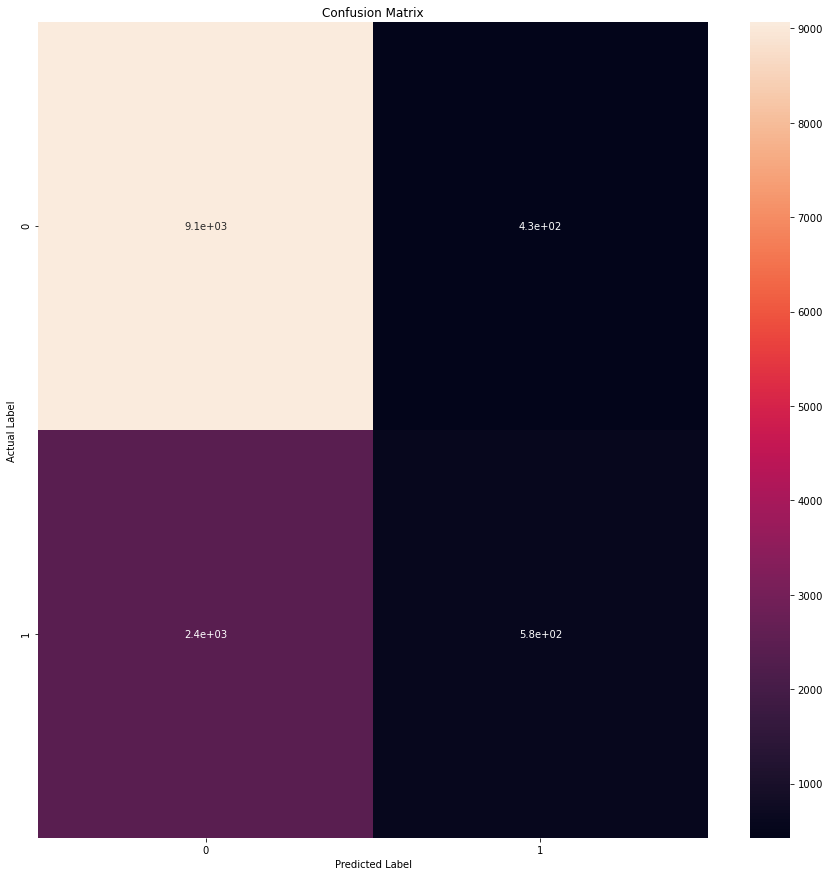

In [78]:
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [80]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.77136
Precision: 0.5761194029850746
Recall: 0.19229491863168383


In [32]:
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [33]:
print(pipe['logisticregression'].coef_)

[[ 0.37740595 -0.02713685 -0.00864241  0.05373972  0.00045463 -0.25657975
  -0.03979373 -0.24301606  0.29637696 -0.00935055 -0.18284258  0.2531819
  -0.16920584  0.16920584]]


In [34]:
coefficients = [0.37740595, -0.02713685, -0.00864241, 0.05373972, 0.00045463, -0.25657975,
-0.03979373, -0.24301606, 0.29637696, -0.00935055, -0.18284258, 0.2531819,
-0.16920584, 0.16920584]

In [35]:
X.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'ultimate_black_user_False',
       'ultimate_black_user_True'],
      dtype='object')

In [36]:
x_col = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'city_Astapor', 'city_King\'s Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'ultimate_black_user_False',
       'ultimate_black_user_True']

In [37]:
tuples = list(zip(x_col, coefficients))
coef_df = pd.DataFrame(tuples, columns=['Features', 'Coefficients'])
coef_df

,Features,Coefficients
0,trips_in_first_30_days,0.377406
1,avg_rating_of_driver,-0.027137
2,avg_surge,-0.008642
3,surge_pct,0.053740
4,weekday_pct,0.000455
5,avg_dist,-0.256580
6,avg_rating_by_driver,-0.039794
7,city_Astapor,-0.243016
8,city_King's Landing,0.296377
9,city_Winterfell,-0.009351


I used logistic regression with a standard scaler to achieve a predictive model of about 77% accuracy. This model is also useful in the way that we can tell which features are the most impactful towards user retainment. The top three were number of trips taken in the first 30 days, the city of Astapor and phone type of iPhone. 